In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/live_data.json

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/live_data.json"  # Adjust path as needed

# Create the file with placeholder content
with open(file_path, "w") as file:
    file.write("[]")  # Empty JSON array
print(f"File created at {file_path}")


File created at /content/drive/MyDrive/live_data.json


In [ ]:
!apt-get install -y tshark


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libbcg729-0 libc-ares2 liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpcap0.8 libsbc1 libsmi2ldbl
  libspandsp2 libspeexdsp1 libwireshark-data libwireshark15 libwiretap12 libwsutil13
  wireshark-common
Suggested packages:
  mmdb-bin snmp-mibs-downloader geoipupdate geoip-database geoip-database-extra libjs-leaflet
  libjs-leaflet.markercluster wireshark-doc
The following NEW packages will be installed:
  libbcg729-0 libc-ares2 liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpcap0.8 libsbc1 libsmi2ldbl
  libspandsp2 libspeexdsp1 libwireshark-data libwireshark15 libwiretap12 libwsutil13 tshark
  wireshark-common
0 upgraded, 16 newly installed, 0 to remove and 49 not upgraded.
Need to get 23.0 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmaxmindd

In [ ]:
!tshark -i eth0 -T json -l > /content/drive/MyDrive/live_data.json

Running as user "root" and group "root". This could be dangerous.
Capturing on 'eth0'
tshark: cap_set_proc() fail return: Operation not permitted

tshark: cap_set_proc() fail return: Operation not permitted

 ** (tshark:1271) 15:30:06.887903 [Main MESSAGE] -- Capture started.
 ** (tshark:1271) 15:30:06.888002 [Main MESSAGE] -- File: "/tmp/wireshark_eth0VKMNY2.pcapng"
175 


In [ ]:
!tshark -i eth0 -f tcp -T fields -e tcp.srcport -e tcp.dstport -e tcp.flags -e ip.src -e ip.dst > /content/drive/MyDrive/live_data.json

Running as user "root" and group "root". This could be dangerous.
Capturing on 'eth0'
tshark: cap_set_proc() fail return: Operation not permitted

tshark: cap_set_proc() fail return: Operation not permitted

 ** (tshark:8878) 16:01:18.213989 [Main MESSAGE] -- Capture started.
 ** (tshark:8878) 16:01:18.214071 [Main MESSAGE] -- File: "/tmp/wireshark_eth07MXEY2.pcapng"
51 


In [ ]:
!tshark -i eth0 -w /content/drive/MyDrive/live_data.pcap

Running as user "root" and group "root". This could be dangerous.
Capturing on 'eth0'
tshark: cap_set_proc() fail return: Operation not permitted

tshark: cap_set_proc() fail return: Operation not permitted

 ** (tshark:8927) 16:01:25.075568 [Main MESSAGE] -- Capture started.
 ** (tshark:8927) 16:01:25.075706 [Main MESSAGE] -- File: "/content/drive/MyDrive/live_data.pcap"
1335 


In [ ]:
!tshark -r /content/drive/MyDrive/live_data.pcap -T fields -e frame.number -e frame.time -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -E header=y -E separator=, -E quote=d -E occurrence=f > /content/drive/MyDrive/live_data.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/live_data.csv')
print(df.head())

   frame.number                           frame.time       ip.src  \
0             1  Dec  9, 2024 16:01:25.069389684 UTC  172.28.0.12   
1             2  Dec  9, 2024 16:01:25.069425720 UTC   172.28.0.1   
2             3  Dec  9, 2024 16:01:25.112792733 UTC  172.28.0.12   
3             4  Dec  9, 2024 16:01:25.112838201 UTC   172.28.0.1   
4             5  Dec  9, 2024 16:01:25.499731078 UTC   172.28.0.1   

        ip.dst  tcp.srcport  tcp.dstport  
0   172.28.0.1       8080.0      50662.0  
1  172.28.0.12      50662.0       8080.0  
2   172.28.0.1       8080.0      39550.0  
3  172.28.0.12      39550.0       8080.0  
4  172.28.0.12      39550.0       8080.0  


In [ ]:
import numpy as np
import pandas as pd
df['tcp.dstport'].fillna(df['tcp.dstport'].median(), inplace=True)
df['tcp.srcport'].fillna(df['tcp.srcport'].median(), inplace=True)
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   frame.number  1335 non-null   int64  
 1   frame.time    1335 non-null   object 
 2   ip.src        1335 non-null   object 
 3   ip.dst        1335 non-null   object 
 4   tcp.srcport   1335 non-null   float64
 5   tcp.dstport   1335 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 62.7+ KB


<ipython-input-52-b2b093e8ad92>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tcp.dstport'].fillna(df['tcp.dstport'].median(), inplace=True)
<ipython-input-52-b2b093e8ad92>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,0
frame.number,0
frame.time,0
ip.src,0
ip.dst,0
tcp.srcport,0
tcp.dstport,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(df)

      frame.number                           frame.time       ip.src  \
0                1  Dec  9, 2024 16:01:25.069389684 UTC  172.28.0.12   
1                2  Dec  9, 2024 16:01:25.069425720 UTC   172.28.0.1   
2                3  Dec  9, 2024 16:01:25.112792733 UTC  172.28.0.12   
3                4  Dec  9, 2024 16:01:25.112838201 UTC   172.28.0.1   
4                5  Dec  9, 2024 16:01:25.499731078 UTC   172.28.0.1   
...            ...                                  ...          ...   
1330          1331  Dec  9, 2024 16:03:20.288779707 UTC   172.28.0.1   
1331          1332  Dec  9, 2024 16:03:20.816958719 UTC   172.28.0.1   
1332          1333  Dec  9, 2024 16:03:20.816976998 UTC  172.28.0.12   
1333          1334  Dec  9, 2024 16:03:20.818459687 UTC  172.28.0.12   
1334          1335  Dec  9, 2024 16:03:20.818485656 UTC   172.28.0.1   

           ip.dst  tcp.srcport  tcp.dstport  
0      172.28.0.1       8080.0      50662.0  
1     172.28.0.12      50662.0       8080.0

In [ ]:
# Convert categorical features to numerical using Label Encoding
import random
import pandas as pd
categorical_features = ['ip.src', 'ip.dst']
# Replace with your actual categorical features
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
# Assuming 'frame.time' and 'tcp.srcport' are object or float types
df['tcp.dstport'] = pd.to_numeric(df['tcp.dstport'], errors='coerce').astype('Int64')
df['tcp.srcport'] = pd.to_numeric(df['tcp.srcport'], errors='coerce').astype('Int64')
df['frame.time'] = pd.to_numeric(df['frame.time'], errors='coerce').astype('Int64')




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   frame.number  1335 non-null   int64
 1   frame.time    0 non-null      Int64
 2   ip.src        1335 non-null   int64
 3   ip.dst        1335 non-null   int64
 4   tcp.srcport   1335 non-null   Int64
 5   tcp.dstport   1335 non-null   Int64
dtypes: Int64(3), int64(3)
memory usage: 66.6 KB


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with 'tcp.dstport' column

# Calculate the 95th percentile of destination ports
threshold = np.percentile(df['tcp.dstport'], 100)

print("Threshold for tcp.dstport:", threshold)

Threshold for tcp.dstport: 59560.0


In [ ]:
for i in range(0,100):

     df.loc[random.choice(df.index), 'tcp.dstport'] = 655555

In [ ]:
df['is_anomalous'] = df['tcp.dstport'].apply(lambda x: 1 if x > threshold else 0)

In [ ]:
df.head()


,frame.number,frame.time,ip.src,ip.dst,tcp.srcport,tcp.dstport,is_anomalous
0,1,<NA>,4,0,33848,443,0
1,2,<NA>,0,4,443,33848,0
2,3,<NA>,3,4,46766,8080,0
3,4,<NA>,4,3,8080,46766,0
4,5,<NA>,4,3,8080,46766,0


In [ ]:
x=df.iloc[:,[0,2,3,4,5]]
y=df.iloc[:,-1]
print(x)
print(y)
print(y.isnull().sum())

      frame.number  ip.src  ip.dst  tcp.srcport  tcp.dstport
0                1       5       4         8080        50662
1                2       4       5        50662         8080
2                3       5       4         8080       655555
3                4       4       5        39550         8080
4                5       4       5        39550         8080
...            ...     ...     ...          ...          ...
1330          1331       4       5        54428         8080
1331          1332       4       5        54428       655555
1332          1333       5       4         8080        54428
1333          1334       5       4         8080        54428
1334          1335       4       5        54428         8080

[1335 rows x 5 columns]
0       0
1       0
2       1
3       0
4       0
       ..
1330    0
1331    1
1332    0
1333    0
1334    0
Name: is_anomalous, Length: 1335, dtype: int64
0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
y_test.head()

,is_anomalous
648,0
85,0
650,0
311,0
695,0


In [ ]:
#x_train['frame.time'] = pd.to_numeric(x_train['frame.time'], errors='coerce')
#x_test['frame.time'] = pd.to_numeric(x_test['frame.time'], errors='coerce')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, max_depth=8,criterion='entropy',min_samples_split=10,random_state=42)
classifier.fit(x_train_pca,y_train)
y_pred=classifier.predict(x_test_pca)
cm=confusion_matrix(y_test,y_pred)
accuracy1=accuracy_score(y_test,y_pred)
print("accuracy",accuracy1*100)
print(cm)


accuracy 99.10179640718563
[[311   0]
 [  3  20]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
classifier1=SVC(kernel='linear',random_state=0)
classifier1.fit(x_train_pca,y_train)
y_pred=classifier1.predict(x_test_pca)
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy*100)
print(cm)

accuracy 97.90419161676647
[[311   0]
 [  7  16]]


In [ ]:
print(df['is_anomalous'].value_counts())  # Check the distribution of your target variable

is_anomalous
0    969
1     97
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score
#y_pred=classifier.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
#y_pred=pd.DataFrame(y_pred)


Accuracy:97.90%
confusion matrix
[[311   0]
 [  7  16]]


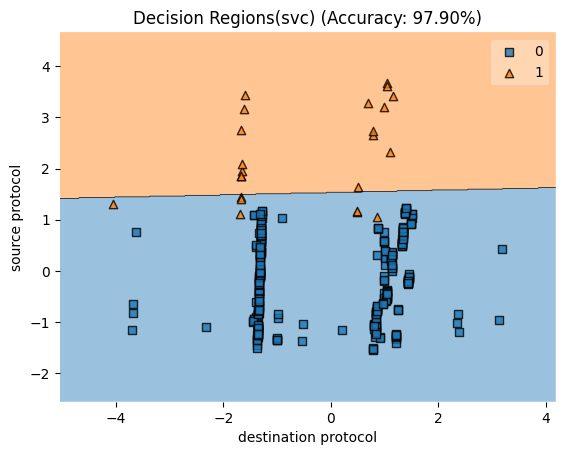

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
y_test_np = y_test.to_numpy()
plot_decision_regions(x_test_pca,y_test_np,classifier1)
plt.ylabel('source protocol')
plt.xlabel('destination protocol')
print(f"Accuracy:{accuracy*100:.2f}%")
cm=confusion_matrix(y_test_np,y_pred)
print("confusion matrix")
print(cm)
plt.title(f'Decision Regions(svc) (Accuracy: {accuracy*100:.2f}%)')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print("SVC:")
print(cr)

SVC:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       1.00      0.70      0.82        23

    accuracy                           0.98       334
   macro avg       0.99      0.85      0.90       334
weighted avg       0.98      0.98      0.98       334



Accuracy:99.10%
confusion matrix
[[311   0]
 [  3  20]]


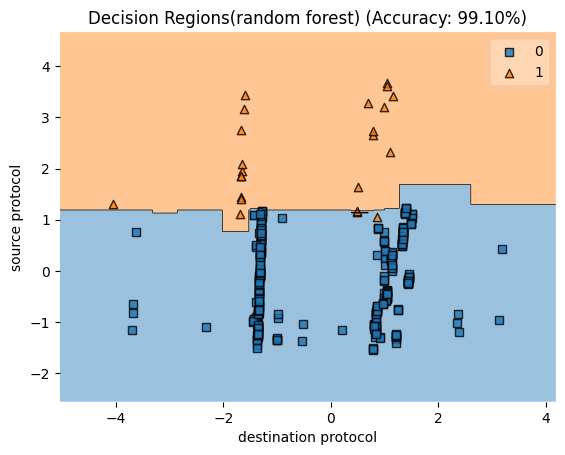

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
y_test_np = y_test.to_numpy()
plot_decision_regions(x_test_pca,y_test_np,classifier)
plt.ylabel('source protocol')
plt.xlabel('destination protocol')
print(f"Accuracy:{accuracy1*100:.2f}%")
cm=confusion_matrix(y_test_np,y_pred)
print("confusion matrix")
print(cm)
plt.title(f'Decision Regions(random forest) (Accuracy: {accuracy1*100:.2f}%)')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print("===Random Forest===")
print(cr)

===Random Forest===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       1.00      0.70      0.82        23

    accuracy                           0.98       334
   macro avg       0.99      0.85      0.90       334
weighted avg       0.98      0.98      0.98       334



In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Define base learners
estimators = [
         ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
         ('lr', LogisticRegression(random_state=42)),
         ('svm', SVC(random_state=42))
     ]
# Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_classifier.fit(x_train, y_train)
# Voting Classifier
voting_classifier = VotingClassifier(estimators=estimators, voting='hard')  # or 'soft'
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('svm', SVC(random_state=42))])

In [ ]:
y_pred_voting=voting_classifier.predict(x_test)
accuracy1=accuracy_score(y_test,y_pred_voting)
print(accuracy1)
y_pred_stacking=stacking_classifier.predict(x_test)
accuracy2=accuracy_score(y_test,y_pred_stacking)
print(accuracy2)

1.0
1.0


In [ ]:
num_regions = len(np.unique(classifier.predict(x_test_pca)))
print(f"Number of Decision Regions: {num_regions}")

region_0_points = x_test_pca[classifier.predict(x_test_pca) == 0]
print(f"Number of points in Region 0: {len(region_0_points)}")

Number of Decision Regions: 2
Number of points in Region 0: 314


In [ ]:
print(df.columns)

Index(['frame.number', 'frame.time', 'ip.src', 'ip.dst', 'tcp.srcport',
       'tcp.dstport', 'is_anomalous'],
      dtype='object')


In [ ]:

#for col in ['ip.src', 'tcp.srcport']:
 #   df[col] = le.fit_transform(df[col])


#print(df.iloc[901,:])
x1 = df.iloc[random.choice(df.index),[0,2,3,4,5]]
x1_pca=pca.transform(x1.values.reshape(1,-1))

print(x1)
y1 = classifier.predict(x1_pca)

if y1==1:
    print("Detected=normal")
else:
    print("normal")

frame.number      602
ip.src              4
ip.dst              5
tcp.srcport     59016
tcp.dstport      8080
Name: 601, dtype: Int64
Detected=normal


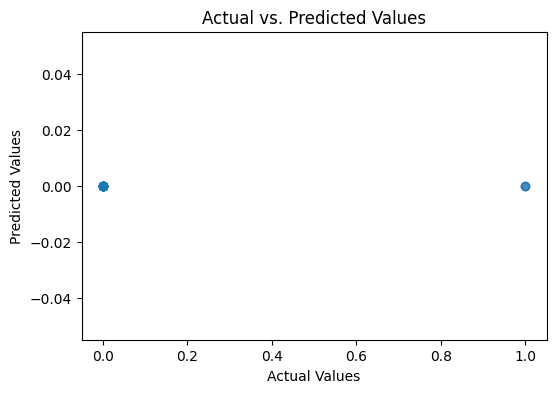

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test contains your actual values and y_pred contains your model's predictions
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0]
